# Simple First Pass Linear Regression Model

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams




As a first pass naive prediction function, we will use a linear regression to model the relationship between a set of independent variables $X$ (which includes temperature, preciptation, previous price of wheat, and price of corn) and a dependent variable (our predicted price) $Y$.  This method assumes the relationship between each predictor $X$ is linearly related our price $Y$. We do not believe this is true, however, it is a starting point for exploring other models.  


$$ Y = \beta_0 + \beta_1 X $$

This is the simplest form of linear regression (one variable), we'll call this the simple model. 

* $\beta_0$ is the intercept of the linear model

* Multiple linear regression where we would input all four factors together will be in the form
    * $X_1$, $X_2$, $X_3$, $\ldots$

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p  $$

We can then estimate $\beta_0$ by using the least squares approximation method  by minimizing the difference between the following: 

$$ S = \sum_{i=1}^N r_i = \sum_{i=1}^N (y_i - (\beta_0 + \beta_1 x_i))^2 $$

where $N$ is the number of observations.  

First we plot the price of wheat in 2014, and attempt to model the price with a linear regression.

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


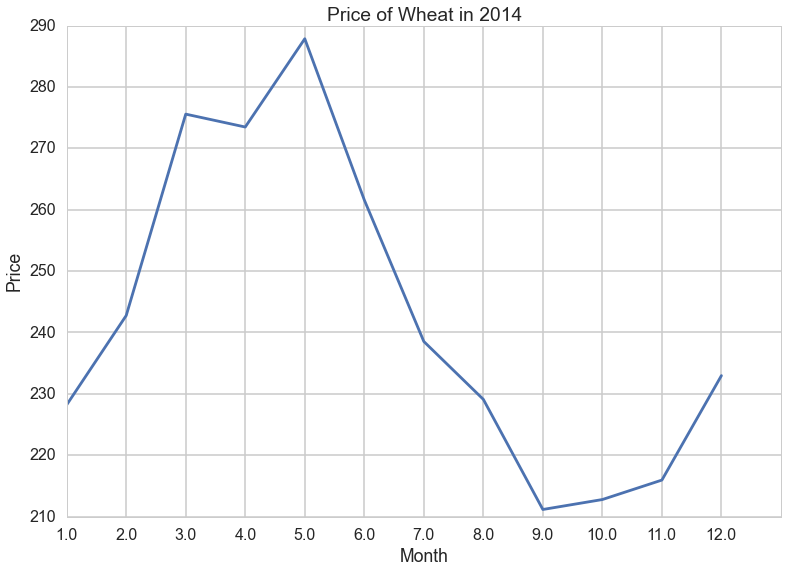

In [48]:

price_df=pd.read_csv("../cleaned_data/wheatprice_df.csv")

months={'Jan':1.0,'Feb':2.0,'Mar':3.0,'Apr':4.0,'May':5.0,'Jun':6.0,'Jul':7.0,'Aug':8.0,'Sep':9.0,'Oct':10.0,'Nov':11.0,'Dec':12.0}
for i in np.arange(len(price_df.index)):
    price_df['month'][i]=months[price_df['month'][i]]

price_2014 = price_df[price_df.year == 2014].reset_index()
plt.plot(price_2014.price)
plt.xticks(price_2014.index, price_2014.month)
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price of Wheat in 2014')


One factor that we looked into was seeing the correlation between Corn price and wheat price. We show the linear regression relationship below. Eventually the corn price would be one of the factors that we feed into our model to predict the price of wheat.

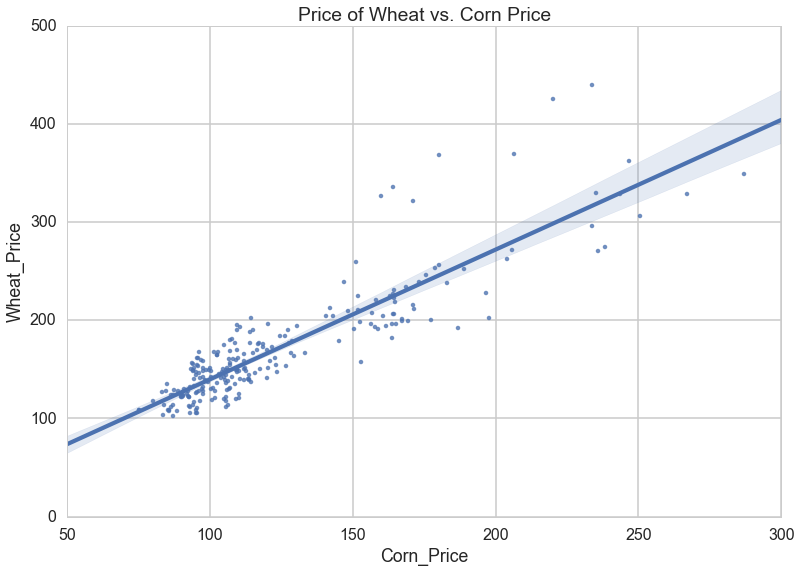

In [45]:
big_df=pd.read_csv("../cleaned_data/dftouse.csv")
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price of Wheat vs. Corn Price')
sns.regplot(y="Wheat_Price", x="Corn_Price", data=big_df, fit_reg = True)

In [4]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols
m = ols('Wheat_Price ~ Corn_Price',big_df).fit()
print m.summary()

                            OLS Regression Results                            
Dep. Variable:            Wheat_Price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     877.5
Date:                Mon, 07 Dec 2015   Prob (F-statistic):           8.45e-82
Time:                        14:17:45   Log-Likelihood:                -1132.6
No. Observations:                 240   AIC:                             2269.
Df Residuals:                     238   BIC:                             2276.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.6294      5.783      1.319      0.1

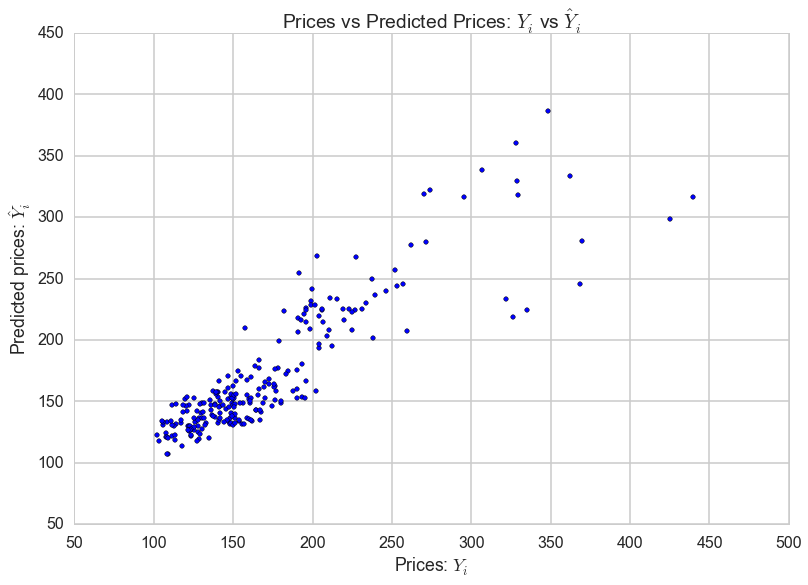

In [5]:
plt.scatter(big_df['Wheat_Price'], m.fittedvalues)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

Now we try to look at correlation between Wheat Price and precipiation
 

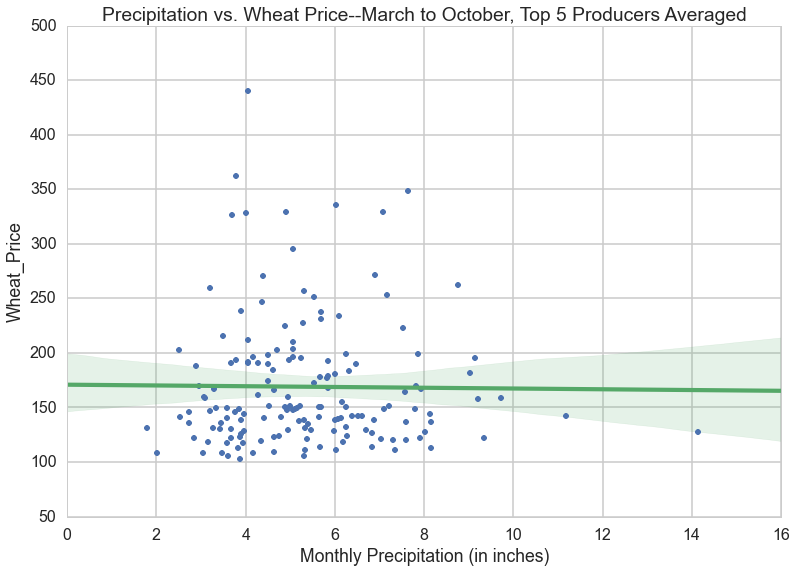

In [14]:
#Top 5 producers averaged, March through October 
months = ['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
big_df_Mar_to_Oct = big_df.loc[big_df['Month'].isin(months)]
plt.plot(big_df_Mar_to_Oct[["KS_P", "MT_P","ND_P","WA_P","ID_P"]].mean(axis=1),big_df_Mar_to_Oct['Wheat_Price'],'.')
plt.ylabel('Wheat Price($)')

plt.title('Precipitation vs. Wheat Price--March to October, Top 5 Producers Averaged')
sns.regplot( x=big_df_Mar_to_Oct[["KS_P", "MT_P","ND_P","WA_P","ID_P"]].mean(axis=1), y=big_df_Mar_to_Oct['Wheat_Price'], data=big_df, fit_reg = True)
plt.xlabel('Monthly Precipitation (in inches)')

Linear Correlation between Wheat price and monthly is nonexistent.

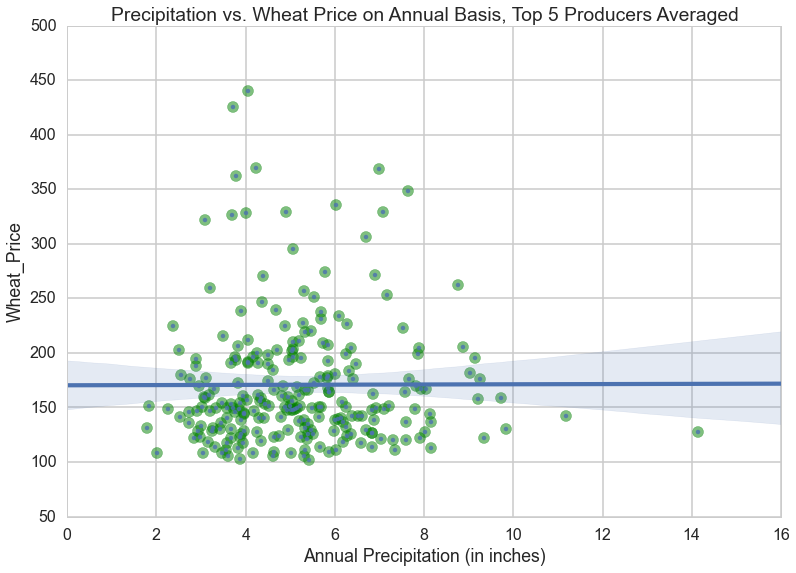

In [25]:
plt.scatter(big_df[["KS_P", "MT_P","ND_P","WA_P","ID_P"]].mean(axis=1),big_df['Wheat_Price'],s=120,alpha=.5,color='g')
plt.ylabel('Wheat Price($)')
plt.title('Precipitation vs. Wheat Price on Annual Basis, Top 5 Producers Averaged')
sns.regplot( x=big_df[["KS_P", "MT_P","ND_P","WA_P","ID_P"]].mean(axis=1), y=big_df['Wheat_Price'], data=big_df, fit_reg = True)
plt.xlabel('Annual Precipitation (in inches)')

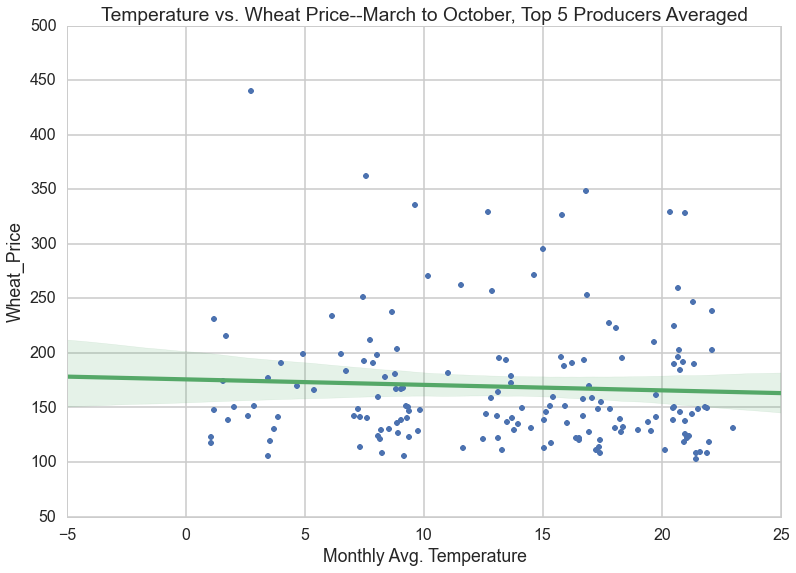

In [26]:
#Top 5 producers averaged, March through October 
months = ['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
bigdf_Mar_to_Oct = big_df.loc[big_df['Month'].isin(months)]
plt.plot(bigdf_Mar_to_Oct [["KS_T", "MT_T","ND_T","WA_T","ID_T"]].mean(axis=1),bigdf_Mar_to_Oct ['Wheat_Price'],'.')
plt.ylabel('Wheat Price($)')
plt.title('Temperature vs. Wheat Price--March to October, Top 5 Producers Averaged')
sns.regplot( x=bigdf_Mar_to_Oct [["KS_T", "MT_T","ND_T","WA_T","ID_T"]].mean(axis=1), y=bigdf_Mar_to_Oct ['Wheat_Price'], data=big_df, fit_reg = True)
plt.xlabel('Monthly Avg. Temperature')

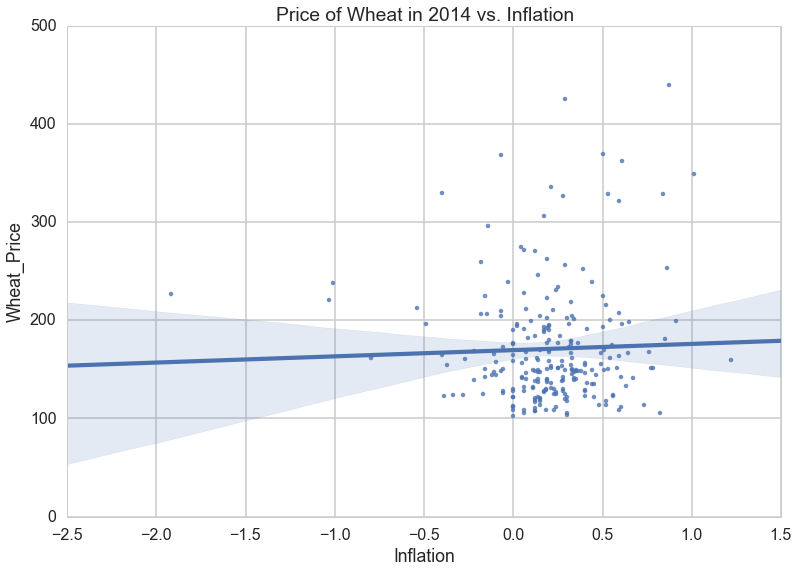

In [30]:
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price of Wheat in 2014 vs. Inflation')
sns.regplot(y="Wheat_Price", x="Inflation", data=big_df, fit_reg = True)

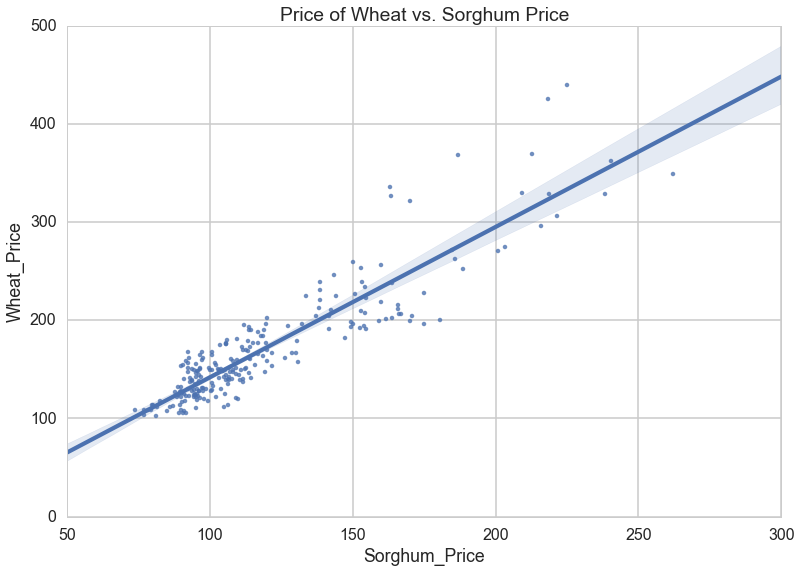

In [43]:
big_df=pd.read_csv("../cleaned_data/sorgmod_dftouse.csv")
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price of Wheat vs. Sorghum Price')
sns.regplot(y="Wheat_Price", x="Sorghum_Price", data=big_df, fit_reg = True)

In [41]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols
m = ols('Wheat_Price ~ Sorghum_Price',big_df).fit()
print m.summary()

                            OLS Regression Results                            
Dep. Variable:            Wheat_Price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1120.
Date:                Mon, 07 Dec 2015   Prob (F-statistic):           5.65e-92
Time:                        20:29:44   Log-Likelihood:                -1109.0
No. Observations:                 240   AIC:                             2222.
Df Residuals:                     238   BIC:                             2229.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       -11.3349      5.671     -1.999

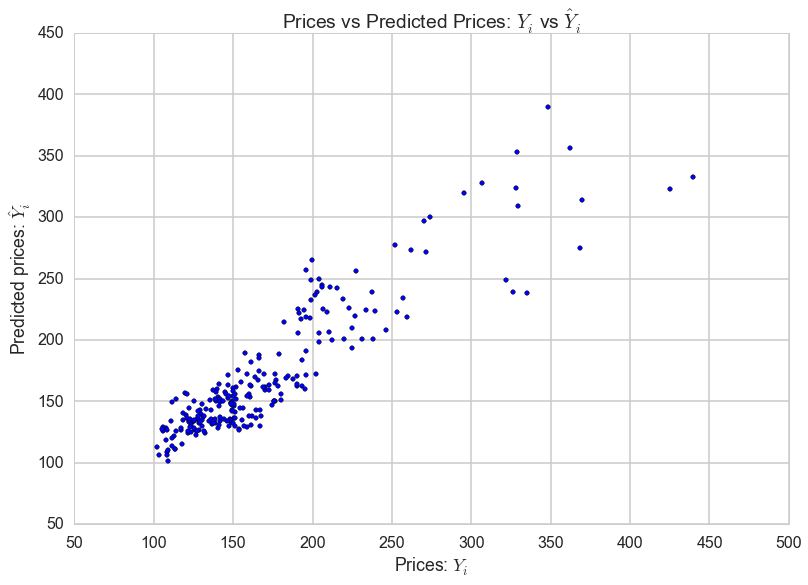

In [42]:
plt.scatter(big_df['Wheat_Price'], m.fittedvalues)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

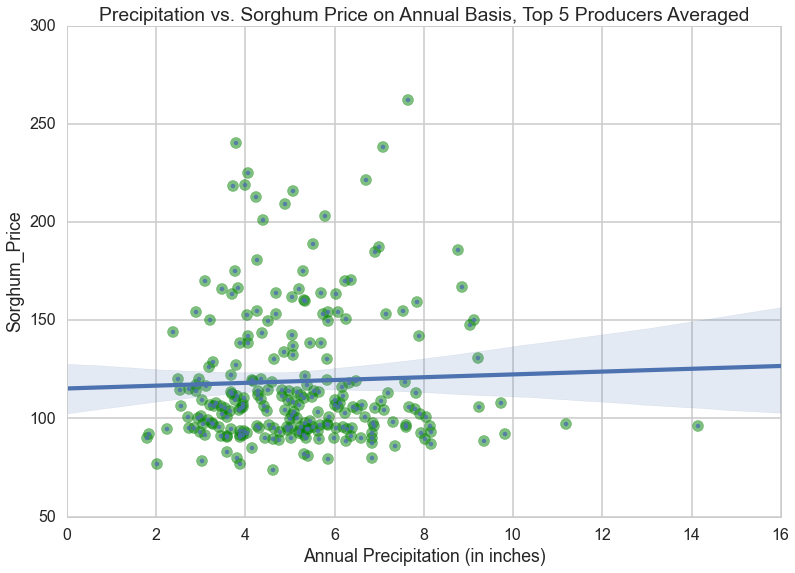

In [53]:
big_df=pd.read_csv("../cleaned_data/sorgmod_dftouse.csv")
plt.scatter(big_df[["KS_P", "MT_P","ND_P","WA_P","ID_P"]].mean(axis=1),big_df['Sorghum_Price'],s=120,alpha=.5,color='g')
plt.ylabel('Wheat Price($)')
plt.title('Precipitation vs. Sorghum Price on Annual Basis, Top 5 Producers Averaged')
sns.regplot( x=big_df[["KS_P", "MT_P","ND_P","WA_P","ID_P"]].mean(axis=1), y=big_df['Sorghum_Price'], data=big_df, fit_reg = True)
plt.xlabel('Annual Precipitation (in inches)')

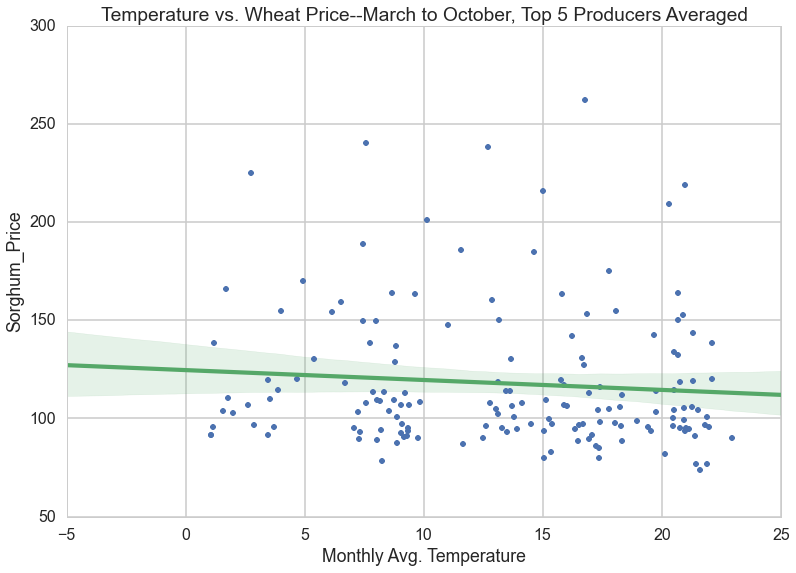

In [56]:
big_df=pd.read_csv("../cleaned_data/sorgmod_dftouse.csv")
months = ['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
bigdf_Mar_to_Oct = big_df.loc[big_df['Month'].isin(months)]
plt.plot(bigdf_Mar_to_Oct [["KS_T", "MT_T","ND_T","WA_T","ID_T"]].mean(axis=1),bigdf_Mar_to_Oct ['Sorghum_Price'],'.')
plt.ylabel('Sorghum Price($)')
plt.title('Temperature vs. Wheat Price--March to October, Top 5 Producers Averaged')
sns.regplot( x=bigdf_Mar_to_Oct [["KS_T", "MT_T","ND_T","WA_T","ID_T"]].mean(axis=1), y=bigdf_Mar_to_Oct ['Sorghum_Price'], data=big_df, fit_reg = True)
plt.xlabel('Monthly Avg. Temperature')